In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Fraud_check.csv')

In [3]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data.shape

(600, 6)

In [5]:
data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [6]:
data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


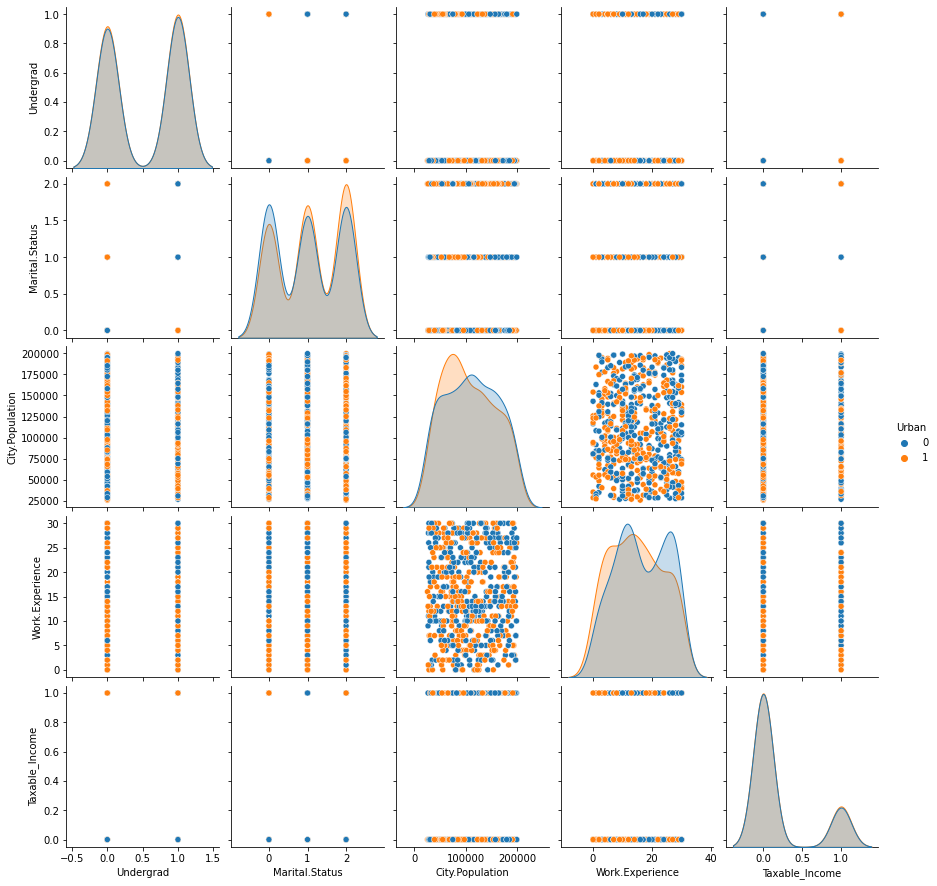

In [46]:
sns.pairplot(data,hue='Urban')
plt.show()

In [8]:
data.loc[data['Taxable.Income']<=30000,'Taxable_Income'] = 'Risky'
data.loc[data['Taxable.Income']>30000,'Taxable_Income'] = 'Good'

In [9]:
data.drop('Taxable.Income',axis=1,inplace =True)

In [10]:
le = LabelEncoder()

In [11]:
data['Undergrad'] = le.fit_transform(data['Undergrad'])
data['Marital.Status'] = le.fit_transform(data['Marital.Status'])
data['Urban'] = le.fit_transform(data['Urban'])
data['Taxable_Income'] = le.fit_transform(data['Taxable_Income'])

In [12]:
data.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_Income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


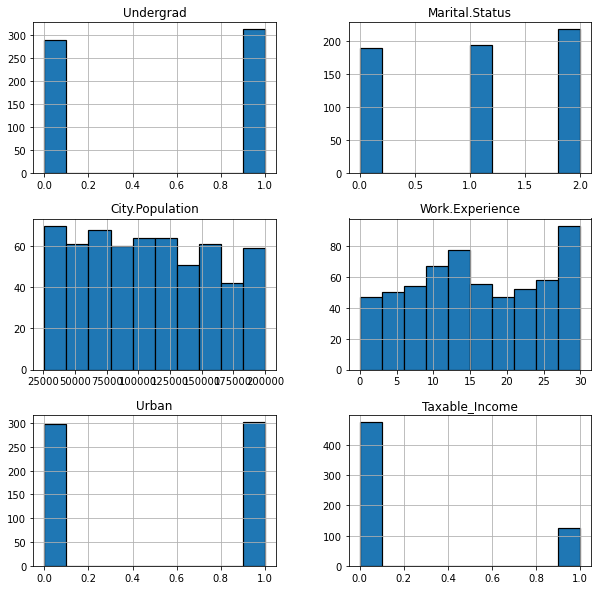

In [13]:
data.hist(edgecolor='black',linewidth =1.2,figsize=(10,10))
plt.show()

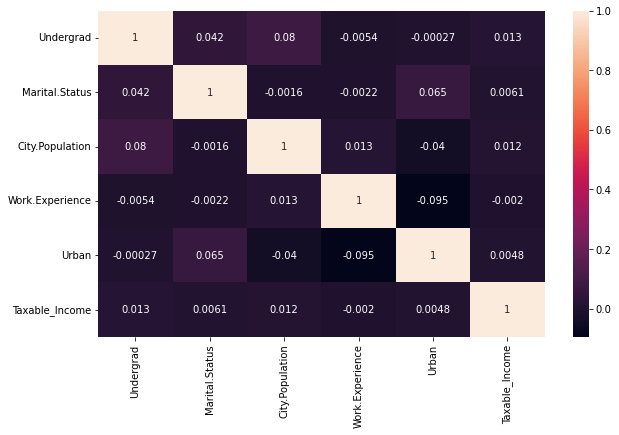

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [15]:
x = data.drop('Taxable_Income',axis=1)
y = data[['Taxable_Income']]

In [31]:
scale = StandardScaler()
std   = std.fit_transform(x)
x_scaled = pd.DataFrame(std,columns=x.columns)

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20,random_state=30)

In [33]:
x_train.shape,y_train.shape

((480, 5), (480, 1))

In [34]:
x_test.shape,y_test.shape

((120, 5), (120, 1))

In [35]:
Rf = RandomForestClassifier()
Rf.fit(x_scaled,y)

RandomForestClassifier()

In [36]:
y_pred_train = Rf.predict(x_train)

In [37]:
accuracy_score(y_train,y_pred_train)

1.0

In [49]:
print('confusion matrix:\n',confusion_matrix(y_train,y_pred_train))

confusion matrix:
 [[384   0]
 [  0  96]]


In [38]:
y_pred_test = Rf.predict(x_test)

In [39]:
accuracy_score(y_test,y_pred_test)

1.0

In [50]:
print('confusion matrix:\n',confusion_matrix(y_test,y_pred_test))

confusion matrix:
 [[92  0]
 [ 0 28]]
